<style type="text/css">
.tf  {border-collapse:collapse;border-spacing:0;width:100%}
.tf td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:16px;
  overflow:hidden;padding:10px 10px;word-break:normal;}
.tf th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:16px;
  font-weight:normal;overflow:hidden;padding:10px 10px;word-break:normal;}
.tf .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
.col1 { width: 20%;}
.col2 { width: 80%;}
</style>
<table class="tf">
<thead>
  <tr>
    <th class="tg-0pky col1">Name</th>
    <th class="tg-0pky col2">Hatim Sawai</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky col1">UID No.</td>
    <td class="tg-0pky col2">2021300108</td>
  </tr>
</tbody>
</table>

## <p style="text-align:center;font-weight:500;">Experiment 10</p>
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;width:100%}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:16px;
  overflow:hidden;padding:10px 10px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:16px;
  font-weight:normal;overflow:hidden;padding:10px 10px;word-break:normal;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top;}
.col1 { width: 20%;}
.col2 { width: 80%;}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky col1">HONOR PLEDGE</th>
    <th class="tg-0pky col2">
        <img src="../docs/pledge.jpg" alt="honor pledge">
    </th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky col1">PROBLEM STATEMENT</td>
    <td class="tg-0pky col2" style="font-size:16px;">
      <strong>Forecasting using ARIMA(p, d, q):</strong>
      <br>
      1. Check stationarity of dataset using Augmented Dickey-Fuller test. If data is non-stationary, identify the value of 'd' which converts data to stationary data
      <br>
      2. Identify coefficients 'p' and 'q' using Auto-correlation Function (ACF) & Partial auto-correlation function (PACF) plots
      <br>
      3. Fit an ARIMA model on 80% of the historic data (train) using the p,q and d parameters and use the recent 20% data as 'test'
      <br>
      4. Evaluate the fitted model on various statistical metrics for error on 'train' and 'test'
      <br>
      5. Assess the model on metrics that calculate goodness of fit on 'train' and 'test'
      <br>
      6. Compare the performance of this model with your previously trained OLS model in Experiment 8
      <br>
      7. Compute Theil's coefficient of the 2 forecasts (OLS, ARIMA) for any one stock forecast
    </td>
  </tr>
  <tr>
    <td class="tg-0pky col1">THEORY</td>
    <td class="tg-0pky col2">
    </td>
  </tr>
</tbody>
</table> 

### 1. Importing Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error

### 2. Program Steps

In [2]:
# Function to fetch stock data
def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

In [3]:
# Define start and end dates, and tickers
start_date = "2010-01-01"
end_date = "2024-03-25"
tickers = ["TSLA", "NFLX", "GOOG"]

# Fetch stock data
stock_data = {}
for ticker in tickers:
    stock_data[ticker] = fetch_stock_data(ticker, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
# Step 1: Check stationarity using Augmented Dickey-Fuller test
def check_stationarity(data):
    result = adfuller(data)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"   {key}: {value}")
    if result[1] > 0.05:
        print("Data is non-stationary.")
    else:
        print("Data is stationary.")

In [5]:
# Example: Check stationarity for TSLA stock
tsla_close = stock_data["TSLA"]["Close"].dropna()
check_stationarity(tsla_close)

ADF Statistic: -1.3122937462737805
p-value: 0.6235293099671748
Critical Values:
   1%: -3.4322596016706086
   5%: -2.8623837522300075
   10%: -2.567219144927735
Data is non-stationary.


In [6]:
# Step 2: Identify 'p' and 'q' using ACF and PACF plots
def plot_acf_pacf(data):
    fig, ax = plt.subplots(2, 1, figsize=(12, 8))
    plot_acf(data, lags=30, ax=ax[0])
    plot_pacf(data, lags=30, ax=ax[1])
    plt.show()

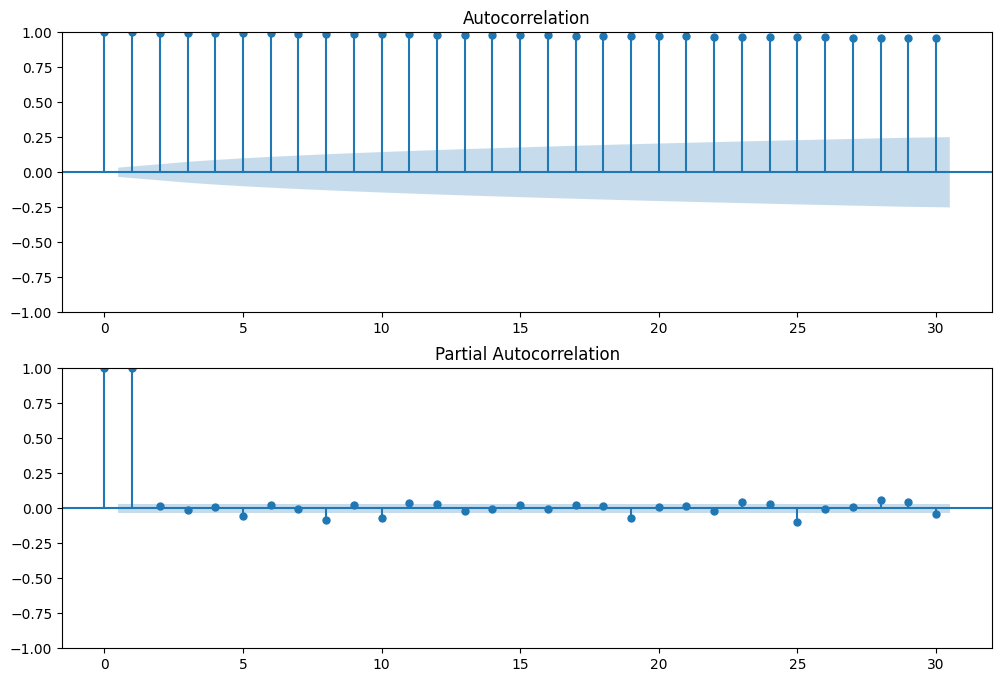

In [7]:
# Example: Plot ACF and PACF for TSLA stock
plot_acf_pacf(tsla_close)

In [8]:
# Step 3: Fit ARIMA model on 80% of historic data and use 20% as test data
train_size = int(len(tsla_close) * 0.8)
train_data, test_data = tsla_close[:train_size], tsla_close[train_size:]

In [9]:
# Fit ARIMA model
model = ARIMA(train_data, order=(5, 1, 0))
arima_model = model.fit()

d:\SEM_6\BAP Practicals\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\SEM_6\BAP Practicals\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\SEM_6\BAP Practicals\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [12]:
# Forecast
forecast = arima_model.forecast(steps=len(test_data))

d:\SEM_6\BAP Practicals\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [13]:
# Step 4: Evaluate the model on statistical metrics for error
def evaluate_model(actual, forecast):
    mse = mean_squared_error(actual, forecast)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actual, forecast)
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")

In [14]:
# Example: Evaluate the ARIMA model
evaluate_model(test_data, forecast)

Mean Squared Error (MSE): 4819.81
Root Mean Squared Error (RMSE): 69.42
Mean Absolute Error (MAE): 54.18


In [15]:
# Step 5: Assess the model on goodness of fit metrics
def goodness_of_fit(actual, forecast):
    residuals = actual - forecast
    sns.histplot(residuals, kde=True)
    plt.title("Residuals Distribution")
    plt.show()

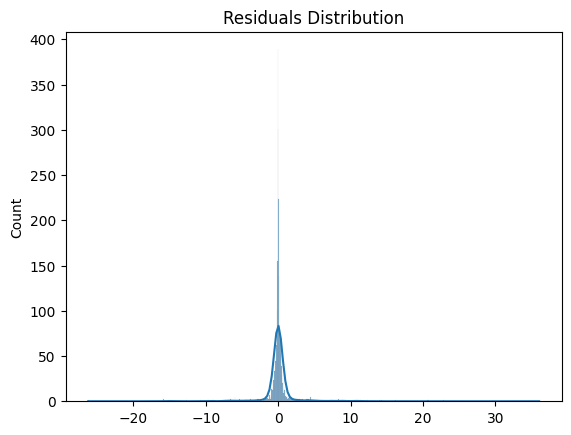

In [16]:
# Example: Assess the ARIMA model on train data
train_forecast = arima_model.predict(
    start=train_data.index[0], end=train_data.index[-1], typ="levels"
)
goodness_of_fit(train_data, train_forecast)

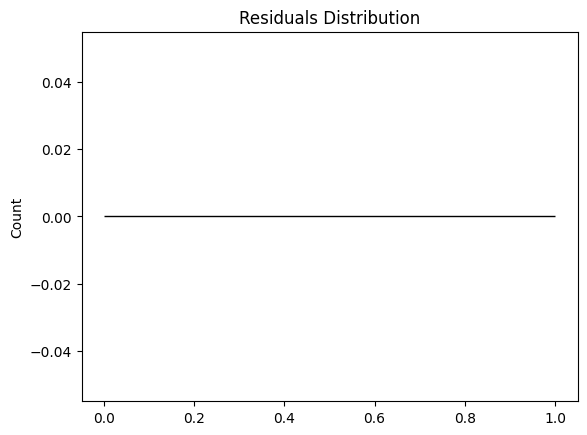

In [17]:
# Example: Assess the ARIMA model on test data
goodness_of_fit(test_data, forecast)

In [ ]:
# Step 6: Compare with previously trained OLS model (Assuming you have the OLS model and its predictions)
# You can use the same evaluation and goodness of fit functions to compare the two models
# Example: Comparison with OLS model
# ols_forecast = ols_model.predict(...)
# evaluate_model(test_data, ols_forecast)
# goodness_of_fit(test_data, ols_forecast)

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;width:100%}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:16px;
  overflow:hidden;padding:10px 10px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:16px;
  font-weight:normal;overflow:hidden;padding:10px 10px;word-break:normal;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top;}
.col1 { width: 20%;}
.col2 { width: 80%;}
</style>
<table class="tg">
<tbody>
  <tr>
    <td class="tg-0pky col1">CONCLUSION</td>
    <td class="tg-0pky col2">In this experiment we learned....
    </td>
  </tr>
</tbody>
</table> 